# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

complete_data = pd.merge(study_results,mouse_metadata, how="right",)

# Display the data table for preview
complete_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [45]:
# Checking the number of mice.
complete_data["Mouse ID"].count()

1893

In [46]:
dp = complete_data # Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#dp = complete_data[["Mouse ID",	"Timepoint",	"Tumor Volume (mm3)","Metastatic Sites","Drug Regimen",	"Sex",	"Age_months",	"Weight (g)",]]
#dp.set_index(['Mouse ID'])['Timepoint']

jp = dp.duplicated(subset=['Mouse ID','Timepoint'])
#pj = print(str(jp))
#two_groups = str(pj) 
#type(two_groups)
#dp.drop_duplicates(inplace = True)
#jp.str.extract(two_groups, expand=True)
#jp[0] = jp[0].str.extract("True")
jp
#cd_dup = complete_data.duplicated(subset=['Mouse ID'])['Timepoint']

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [47]:
# Optional: Get all the data for the duplicate mouse ID. 
#jp[jp["

In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data.drop_duplicates(inplace = True)
clean_data

In [49]:
# Checking the number of mice in the clean DataFrame.
dpc = dp.count()
dpc


Mouse ID              1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
dtype: int64

## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_Tumor_Volume = dp.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Median_Tumor_Volume	= dp.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Tumor_Volume_Variance = dp.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Tumor_Volume_Std_Dev = dp.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Tumor_Volume_Std_Err = dp.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

sum_stat = pd.DataFrame({"Mean Tumor Volume":  Mean_Tumor_Volume,	"Median Tumor Volume": Median_Tumor_Volume,	"Tumor Volume Variance": Tumor_Volume_Variance,	"Tumor Volume Std. Dev.":	Tumor_Volume_Std_Dev, "Tumor Volume Std. Err.":  Tumor_Volume_Std_Err})	
sum_stat
#di = sum_stat.set_index(["Drug Regimen"])
#di
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
sum_stat.agg(["mean","median","var","std","sem"])
# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
mean,50.980721,49.948493,47.701048,6.809110,0.499756
median,53.060651,51.819532,45.831020,6.766916,0.515219
var,31.613282,22.218503,257.918626,1.485631,0.010519
std,5.622569,4.713651,16.059845,1.218865,0.102561
sem,1.778012,1.490587,5.078569,0.385439,0.032433


## Bar and Pie Charts

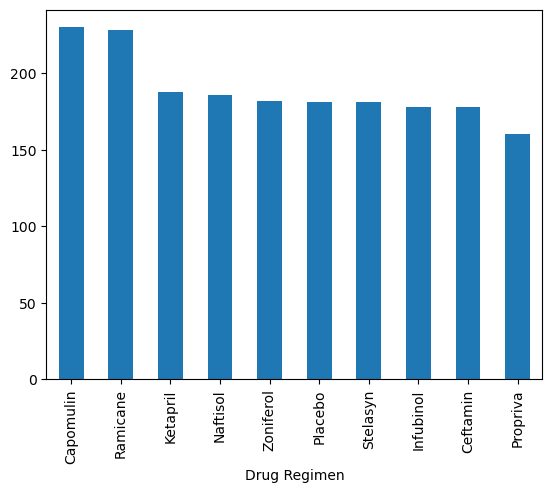

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

y_axis = dp["Drug Regimen"].value_counts()
y_axis.plot(kind="bar")
plt.show()

#x_axis = dp["Drug Regimen"]
#y_axis = sum_stat["Tumor Volume Variance"].max()
#plt.bar("500",y_axis.plot)
#plt.show()
#observations = dp
#x_axis = dp["Drug Regimen"]
#plt.bar(x_axis, observations, color='b', alpha=0.5, align="center")
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])
#drugreg["Timepoint"].plot(kind="bar")

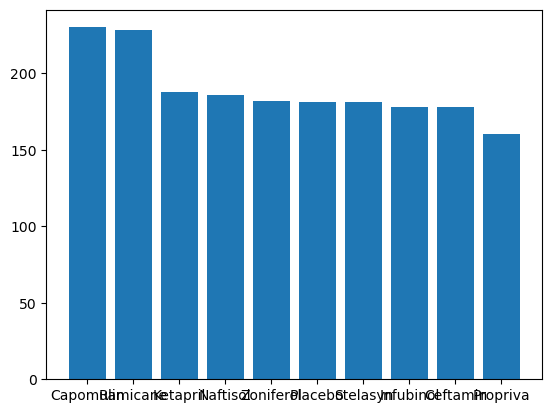

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = dp["Drug Regimen"].value_counts()
plt.bar(y_axis.index.values,y_axis.values)
plt.show()

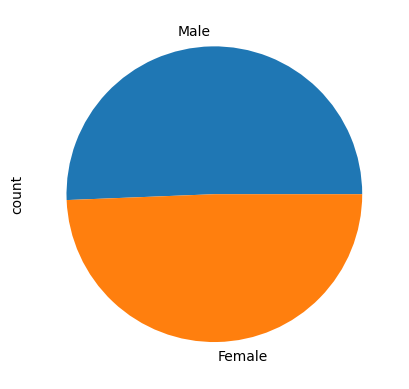

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
y_axis = dp["Sex"].value_counts()
y_axis.plot(kind="pie")
plt.show()

Sex
Male      958
Female    934
Name: count, dtype: int64


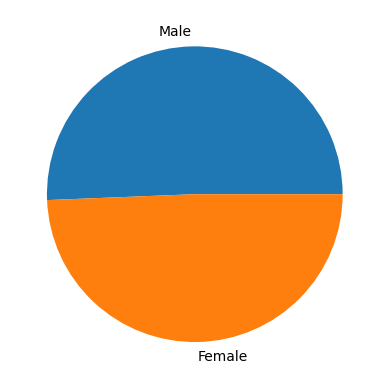

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y_axis = dp["Sex"].value_counts()
print(y_axis)
plt.pie(y_axis.values,labels=y_axis.index.values)
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#drug_list = dp[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
max_timepoint = complete_data.groupby("Mouse ID")["Timepoint"].max().reset_index()
combine = pd.merge(max_timepoint, complete_data, on = ["Mouse ID", "Timepoint"], how = "left") 
combine.head()

#df1 = dp.groupby(["Mouse ID"])["Tumor Volume (mm3)"].max()
#df2 = dp.groupby(["Mouse ID"])["Drug Regimen"].max()
#df3 = dp.groupby(["Mouse ID"])["Timepoint"].max()
#print(df1, df2, df3)
# Start by getting the last (greatest) timepoint for each mouse
#df4 = pd.DataFrame({"Drug Regimen & Tumor Volume":  df1, "df2": df2, "Drug Regimen at Timepoint": df3})	

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vols = []

#newlist = [x for x in df5 if drug_list in x]

   
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drug_list: 
             
        # Locate the rows which contain mice on each drug and get the tumor volumes
        tumor_vol = combine.loc[(combine["Drug Regimen"] == i), "Tumor Volume (mm3)"]

        # add subset 
        tumor_vols.append(tumor_vol)

        # Determine outliers using upper and lower bounds
        quartiles = tumor_vol.quantile([.25,.5,.75])
        lowerq = quartiles[.25]
        upperq = quartiles[.75]
        iqr = upperq - lowerq 

        lower_bound = lowerq - (1.5*iqr)
        upper_bound = lowerq + (1.5*iqr)
    
        outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)] 

        print(f'Regimen {i} - Potential Outliers {outliers}') 
        
   

    
    

    
    
#df4.plot(kind="scatter", x="Drug Regimen", y="Drug Regimen & Tumor Volume", grid=True, figsize=(8,8),
              #title="MPG Vs. Horsepower")

Regimen Capomulin - Potential Outliers 81     47.685963
163    46.539206
Name: Tumor Volume (mm3), dtype: float64
Regimen Ramicane - Potential Outliers 158    45.220869
Name: Tumor Volume (mm3), dtype: float64
Regimen Infubinol - Potential Outliers 27    72.226731
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Regimen Ceftamin - Potential Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


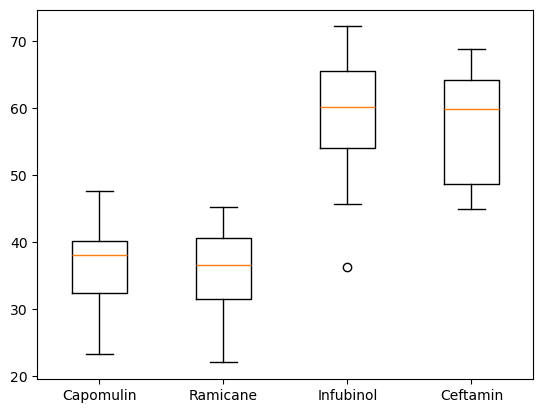

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vols, labels = drug_list)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

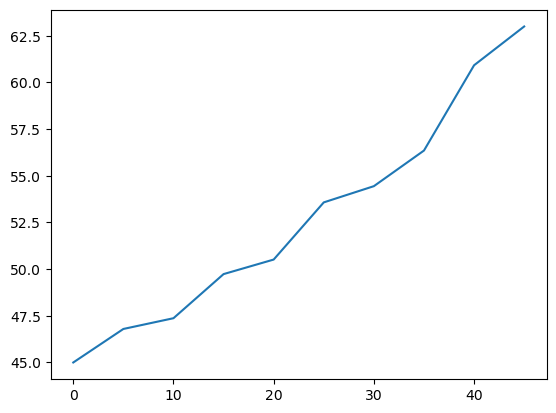

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tft = complete_data.groupby(["Mouse ID"])
rft = tft.get_group("a275")
cft = rft["Timepoint"]
nft = rft["Tumor Volume (mm3)"]

#above_35 = combine.loc[3,"Tumor Volume (mm3)"]

#above_35 = complete_data.groupby(["Mouse ID"])["Timepoint"]
#print(above_35)
x_axis = cft
y_axis = nft
plt.plot(x_axis, y_axis)
plt.show

In [63]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#aft = complete_data.groupby(["Drug Regimen"])["Capomulin"]
capomilin_treatment = complete_data[complete_data["Drug Regimen"].str.contains("Capomulin")]
capomilin_treatment_weight = capomilin_treatment.set_index("Mouse ID")
#= capomilin_treatment.loc(["Mouse ID"])["Weight (g)"]
capomilin_treatment_weight_display = capomilin_treatment_weight.filter(items = ["Weight (g)"])
capomilin_treatment_tumor_volume = capomilin_treatment_weight.filter(items = ["Tumor Volume (mm3)"])
capomilin_treatment_tumor_volume
capomilin_treatment_weight_display
#bft = aft.get_group("Capomulin")
#aft
#average for mouse weight and 


,Weight (g)
Mouse ID,
s185,17
s185,17
s185,17
s185,17
s185,17
...,...
i557,24
r157,25
r157,25


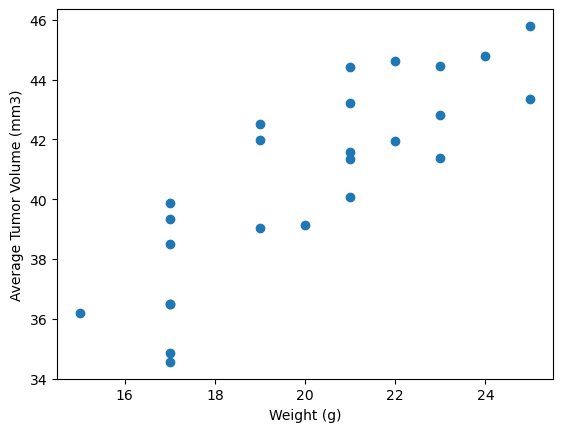

This is how the data for the scatter plot looks.


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


In [66]:

capomulin_table = complete_data[complete_data["Drug Regimen"]=="Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print("This is how the data for the scatter plot looks.")
capomulin_average.head()

## Correlation and Regression

<function matplotlib.pyplot.show(close=None, block=None)>

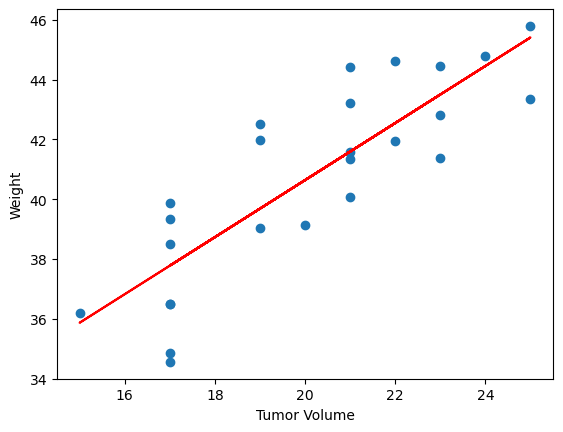

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(capomulin_average['Weight (g)'], 
                                                            capomulin_average['Tumor Volume (mm3)'])
pe_fit = pe_slope * capomulin_average['Weight (g)'] + pe_int # LCL: here you need to multiple slope*x+intercept. The x values come from your scatterplot as we use the same data
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],pe_fit,color='red')
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show